Importing necessary Libraries and loading datatset

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kyanyoga/sample-sales-data")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'sample-sales-data' dataset.
Path to dataset files: /kaggle/input/sample-sales-data


In [ ]:
df = pd.read_csv(path + "/sales_data_sample.csv", encoding='latin1')

In [ ]:
import os

# List files in the directory
print(os.listdir(path))

['sales_data_sample.csv']


Data Preprocessing

In [ ]:
df.head(2)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.0,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.9,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small


In [ ]:
df.shape

(2823, 25)

In [ ]:
df.isnull().sum()

,0
ORDERNUMBER,0
QUANTITYORDERED,0
PRICEEACH,0
ORDERLINENUMBER,0
SALES,0
ORDERDATE,0
STATUS,0
QTR_ID,0
MONTH_ID,0
YEAR_ID,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [ ]:
df.drop(['ADDRESSLINE2', 'STATE', 'POSTALCODE', 'PHONE'], axis=1, inplace=True)

In [ ]:
df.head(2)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,MSRP,PRODUCTCODE,CUSTOMERNAME,ADDRESSLINE1,CITY,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.0,2/24/2003 0:00,Shipped,1,2,2003,...,95,S10_1678,Land of Toys Inc.,897 Long Airport Avenue,NYC,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.9,5/7/2003 0:00,Shipped,2,5,2003,...,95,S10_1678,Reims Collectables,59 rue de l'Abbaye,Reims,France,EMEA,Henriot,Paul,Small


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.drop(['CUSTOMERNAME', 'ADDRESSLINE1', 'CITY', 'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'PRODUCTCODE', 'ORDERNUMBER', 'ORDERLINENUMBER'], axis=1, inplace=True)

In [ ]:
df.head(2)

,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,DEALSIZE
1,34,81.35,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,Small
2,41,94.74,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,Medium


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

EDA

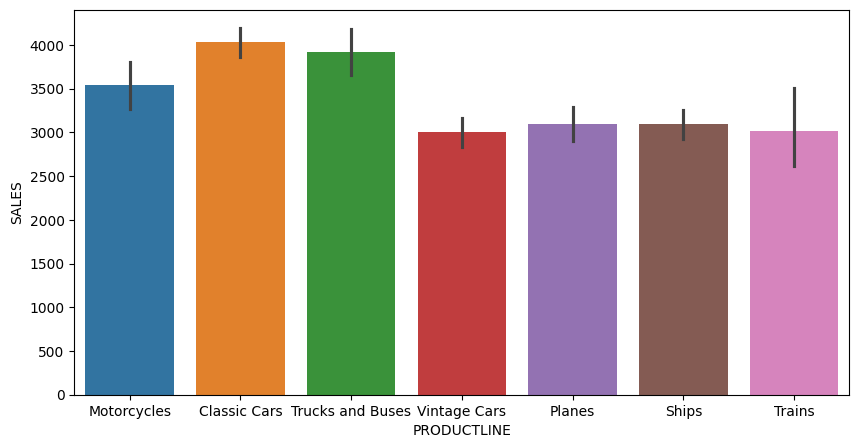

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=df['PRODUCTLINE'],y=df['SALES'] ,hue=df['PRODUCTLINE'])
plt.show()

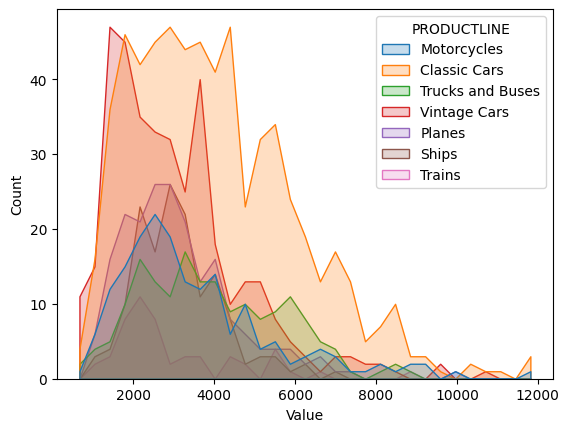

In [ ]:
df_melted = df.melt(id_vars=['PRODUCTLINE'], value_vars=['SALES'], var_name='Variable', value_name='Value')
sns.histplot(data=df_melted, x='Value', hue='PRODUCTLINE', element='poly')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
Categorical = df.select_dtypes(include='object')

In [ ]:
for i in Categorical:
    df[i] = le.fit_transform(df[i])

In [ ]:
X=df[['SALES','QUANTITYORDERED']]

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

Selection of K value

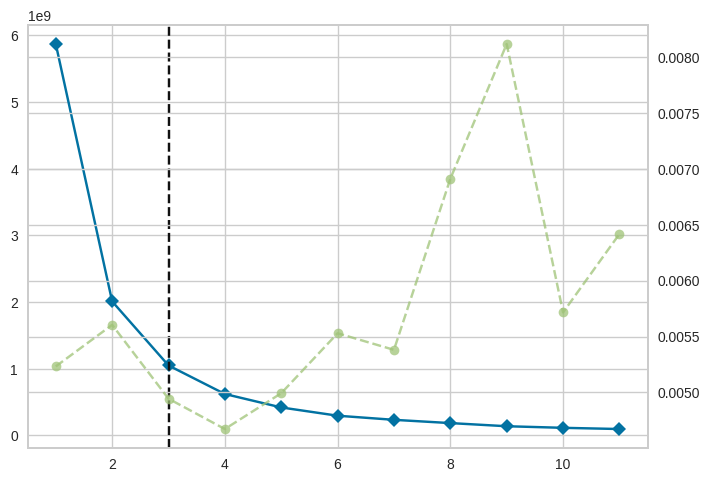

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(X)

# **K = 3**

In [ ]:
KMEANS = KMeans(n_clusters=3,init='k-means++',random_state=42)

Model Training and visualizing the results

In [ ]:
KMEANS.fit(X)
KMEANS.labels_

array([0, 2, 0, ..., 2, 2, 0], dtype=int32)

In [ ]:
from collections import Counter

In [ ]:
Counter(KMEANS.labels_)

Counter({np.int32(0): 843, np.int32(2): 652, np.int32(1): 254})

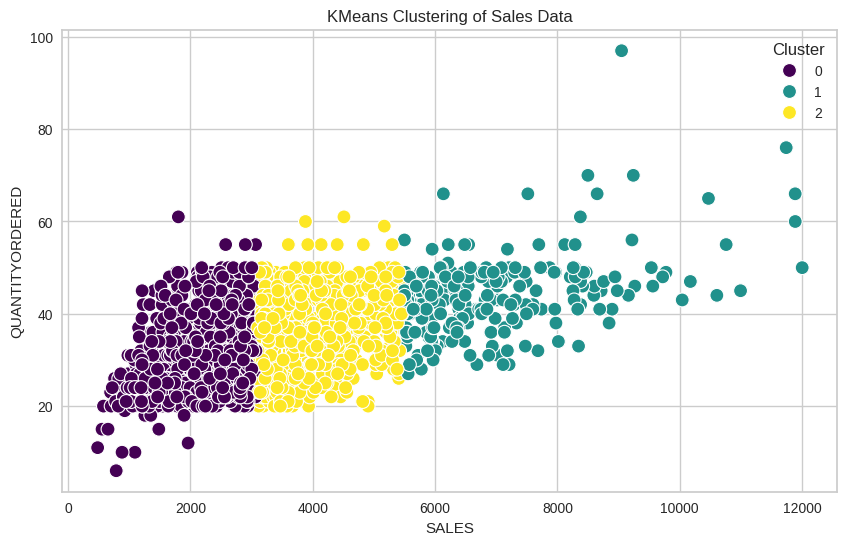

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X['SALES'], y=X['QUANTITYORDERED'], hue=KMEANS.labels_, palette='viridis', s=100)
plt.title('KMeans Clustering of Sales Data')
plt.xlabel('SALES')
plt.ylabel('QUANTITYORDERED')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()